
# Project: Investigate a Dataset - [no-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, the data analysis steps will be used to look at a set of data to find out about some general and specific features. The chosen data set that will be analysed is about Brazilian patients who show up or not for their medical appointments. This data set includes a number of features that are important to this analysis, such as the scheduled day, the hospital's location, and medical insurance.

As the analysis will be conducted, there are at least three independent variables and one dependent variable that will be analysed and investigated. Therefore, some important Python libraries and tools will be utilised in order to show the relationships among those variables. In addition, some visulaizations will be presented to clarify and explore some trends and exploratory factors that led to the patients' decision to show up or not. Then at the end, this report will conclude the findings and answer the following questions in the next cell. Also, the results of this analysis will be communicated at the end of this report.

> Q1: Do people with scholarships tend to show up for their appointments?

> Q2: Do people who receive SMS communication are more likely to attend?

In [1]:
#Importing the nesscery libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from scipy.stats import norm
import scipy.stats as stats
import statistics



<a id='wrangling'></a>
## Data Wrangling

### Gathring data from a source (Kaggle):

In [2]:
df = pd.read_csv('no_show_up_appointments.csv')

#The below line is for renaming some first few columns to make them more readable

df.rename(columns={'PatientId': 'Patient_ID', 'AppointmentID': 'Appointment_ID','Gender':'Gender',
                   'ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day', 'No-show':'attendance'}, inplace=True)
df.head()


,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attendance
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Features of the dataframe:

* Scheduled day: the appointment date set by the patient

* Neighborhood: The medical center's location

* Scholarship: This column specifies whether the patient is registered in the Brazilian welfare programme or not.

* Hypertension: determines whether or not the patient has high blood pressure.

* Diabetes: determines whether or not the diabetic has hypertension..

* Alcoholism: shows if the patient is an alcoholic or not.

* SMS_received: Display whether or not the patient received an SMS reminder to attend the appointment.

* attendance: If the patient fails to appear for a medical appointment. 

## Assessing stage: (Assessing and building intuition)

> Finding problems in the data set

In [3]:
df.shape #to explore the dimensions of the dataframe (rows and columns)

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Patient_ID       110527 non-null  float64
 1   Appointment_ID   110527 non-null  int64  
 2   Gender           110527 non-null  object 
 3   Scheduled_Day    110527 non-null  object 
 4   Appointment_Day  110527 non-null  object 
 5   Age              110527 non-null  int64  
 6   Neighbourhood    110527 non-null  object 
 7   Scholarship      110527 non-null  int64  
 8   Hipertension     110527 non-null  int64  
 9   Diabetes         110527 non-null  int64  
 10  Alcoholism       110527 non-null  int64  
 11  Handcap          110527 non-null  int64  
 12  SMS_received     110527 non-null  int64  
 13  attendance       110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### From the previous cell, it appears that there are no missing values in this data set. However, the types of ScheduledDay and AppointmentDay are invalid data types. The two column types should be datetime instead of objects.


In [5]:
df['attendance'].value_counts() #to see how many patients showed up or did not show up  

No     88208
Yes    22319
Name: attendance, dtype: int64

In [6]:
df.describe() #to get general insight into the data set

,Patient_ID,Appointment_ID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the above statistical analysis, it appears that the minimum age in this data set is -1, which is an incorrect age for human beings.


### Data Cleaning (clean up the discovered problems above and conduct further cleaning steps.)

 

* Incorrect data types fix:

In [7]:
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

df.dtypes #to check if the changes have been applied.

Patient_ID                     float64
Appointment_ID                   int64
Gender                          object
Scheduled_Day      datetime64[ns, UTC]
Appointment_Day    datetime64[ns, UTC]
Age                              int64
Neighbourhood                   object
Scholarship                      int64
Hipertension                     int64
Diabetes                         int64
Alcoholism                       int64
Handcap                          int64
SMS_received                     int64
attendance                      object
dtype: object

Fixing duplicates:

In [8]:
df.duplicated().sum()

0

No duplicate data was found.

* Fixing the (-1) age issue:

In [9]:
#First, let us find the raw value that includes the incorrect value of the age.

incorrect_age1 = df.query('Age < 0')

incorrect_age1

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attendance
99832,4.660000e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
#Now, let us fix it: 

df.drop(99832, inplace=True)

In [11]:
df.describe() #to check if the incorrect value has been removed.

,Patient_ID,Appointment_ID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474932e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560937e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now the incorrect age has been removed, and the minimum age is now zero.

###   * Further cleaning:

Since some columns are not needed in this analysis, then some columns will be removed from the data set. 

In [12]:
df.drop(columns =['Patient_ID', 'Appointment_ID', 'Gender', 'Scheduled_Day', 
                  'Appointment_Day', 'Neighbourhood'], inplace = True)

df #to check if the unnecessary columns have been removed.

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attendance
0,62,0,1,0,0,0,0,No
1,56,0,0,0,0,0,0,No
2,62,0,0,0,0,0,0,No
3,8,0,0,0,0,0,0,No
4,56,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...
110522,56,0,0,0,0,0,1,No
110523,51,0,0,0,0,0,1,No
110524,21,0,0,0,0,0,1,No
110525,38,0,0,0,0,0,1,No


* The instructions given by the database say "No" if the patient showed up to their appointment, and "Yes" if they did not show up.

  So, to fix the naming and exclude the confusion for the column "attendance" the below step will fix this issue:

In [13]:
df['attendance'] = df['attendance'].replace(['No'], 'attended')

df['attendance'] = df['attendance'].replace(['Yes'], 'not attended')

df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attendance
0,62,0,1,0,0,0,0,attended
1,56,0,0,0,0,0,0,attended
2,62,0,0,0,0,0,0,attended
3,8,0,0,0,0,0,0,attended
4,56,0,1,1,0,0,0,attended


In [14]:
df[df['attendance'] == 'not attended'] 

#To check for not attended raws.

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,attendance
6,23,0,0,0,0,0,0,not attended
7,39,0,0,0,0,0,0,not attended
11,29,0,0,0,0,0,1,not attended
17,40,1,0,0,0,0,0,not attended
20,30,0,0,0,0,0,0,not attended
...,...,...,...,...,...,...,...,...
110484,45,0,0,0,0,0,0,not attended
110492,33,0,1,0,0,0,0,not attended
110496,37,0,1,0,0,0,0,not attended
110515,33,0,1,0,0,0,0,not attended


<a id='eda'></a>
## Exploratory Data Analysis

* First, we need to take a broad look at the parts of the data frame that are important for this analysis. 

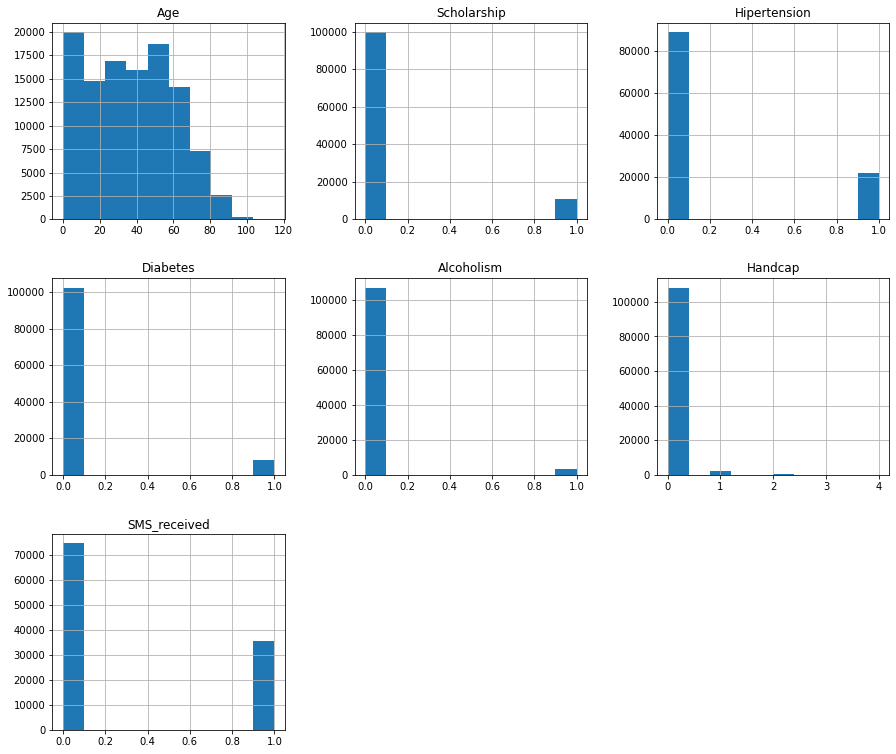

In [15]:
df.hist(figsize=(15,13));

## Note: In the scholarship column, 1 means yes (the patient has a scholarship), and 0 means no ( the patient does not have a scholarship).

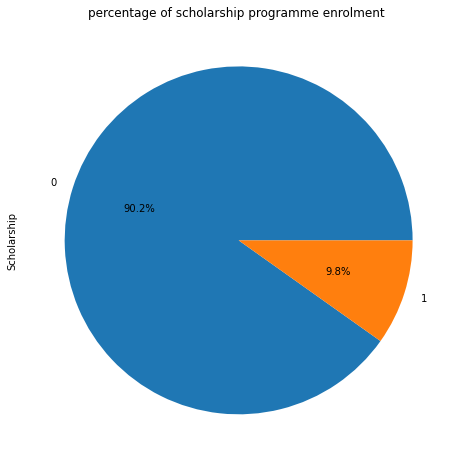

In [16]:
# In the above histgrams, there are some distenct features regarding the statistics of this data set. 

# For example, the number of people who have a scholarship is significantly lower compared with those who do not.
# This can also be demonstrated by the following pie chart:

sch_enrolment = df['Scholarship'].value_counts();

sch_enrolment.plot(kind='pie', figsize=(8,8), autopct="%0.1f%%");

plt.title('percentage of scholarship programme enrolment ');


In [17]:
# Another useful piece of information that was provided in the previous histgrams is alcoholism.
# This"alcoholism" histogram shows that the number of non-alcoholics is lower than the number of alcoholics. 


df.Alcoholism.value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

In [18]:
df.attendance.value_counts()

attended        88207
not attended    22319
Name: attendance, dtype: int64

In [19]:
df.Scholarship.value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

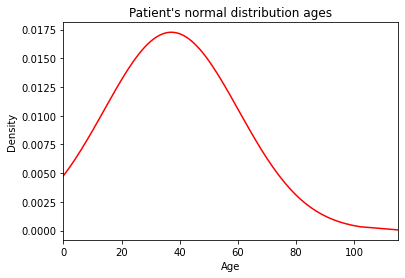

In [20]:
# the variable,"nd", means normal distribution.
# "a" is just a local variable to pass it into the function.
# "P" is probability density function

def nd(a):
    
    age_mean = statistics.mean(a)
    age_std = statistics.stdev(a)
    
    P = stats.norm.pdf(a.sort_values(), age_mean, age_std)
   
    
    plt.plot(a.sort_values(), P, color ='red');
    plt.xlim([a.min(),a.max()])
    
    plt.xlabel("Age")    
    plt.ylabel("Density")
    
    plt.title('Patient\'s normal distribution ages')
    
    plt.show();
    
    return a

nd(df['Age']);

### Research Question 1: Do people with scholarships tend to show up for their appointments?

Text(0.5, 1.0, 'Number of patients who attended or did not attend while enrolled in a scholarship')

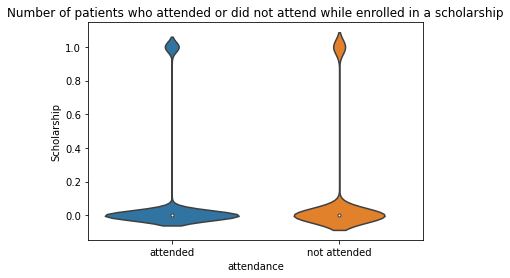

In [21]:
sns.violinplot(data=df, x="attendance", y="Scholarship");

plt.title('Number of patients who attended or did not attend while enrolled in a scholarship')

As it can be clearly seen on the above digram, patients with no scholarships tend to attend their medical appointments more than those who have them.

### Research Question 2: Do people who receive SMS communication are more likely to attend?

Text(0.5, 1.0, 'The likelihood of attending the appointment when received via SMS')

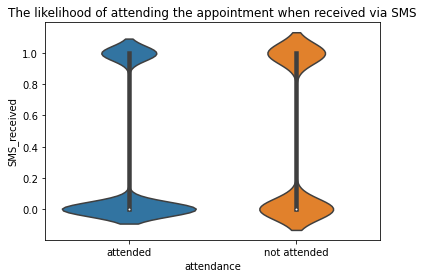

In [22]:
sns.violinplot(data=df, x="attendance", y="SMS_received");

plt.title('The likelihood of attending the appointment when received via SMS')

As shown in the above diagram, people who did not receive SMS attended their appointments, while those who did receive SMS mostly did not attend.

<a id='conclusions'></a>
## Conclusions

From the above analysis, we can cnclude the follwing:

From the above analysis, we can cnclude the follwing:

1- Comparing individuals who have and do not have scholarships, the number of people with scholarships is much fewer. In other words, the number of people with a scholarship is 99665, whereas, the number people who have scholarships is 10861.

2- Another important result of this analysis to note is the number of alcoholics vs. non-alcoholics. The number of non-alcoholics is 107166 and acloholics is 3360.

* In addition, it has been found that, surprising enough, people who do not have scholarships tend to show up for their appointments. In contrast, the number of people enrolled in scholarships is less than the number of those who are not enrolled with regard to attendance at medical appointments.


* Another notable and interesting result of this analysis is that the number of people who did not receive any communication via SMS is higher than the number of people who did receive SMS but did not attend.



### Limitations: 



> When plotting the normal distribution for the ages, only a line was used (would be better if a histogram and a line were together)  because I believe that the data set for age was larger than 100K raws.

> Another issue related to plotting some data is that some types of plots seem to be the only type; however, I have tried to go around that and found better solutions. 

> It would be easier to understand if the "Scholarship" column was filled with yes or no values. That is, this way is more readable and understandable than just 0 or 1, which might not be as clear for other readers. 







## Reference List:


1- https://www.youtube.com/watch?v=jB6bNghCUOQ 

2- https://seaborn.pydata.org/generated/seaborn.violinplot.html

3- https://datatofish.com/replace-values-pandas-dataframe/ 

4- https://www.youtube.com/watch?v=PSAlBuYkW8o

5- https://www.youtube.com/watch?v=8GdvRNblTqg

6- https://stackoverflow.com/questions/71287607/how-to-make-a-normal-distribution-graph-from-data-frame-in-python